In [1]:
# DAB 103 Win 2021 Analytical Tools and Decision Making Project 
# Group 2 
# Group Members
   # Deepa Taneja Chawla
   # Disha Jay Barot 
   # Zeel Brahmbhatt 
   # Sarabjeet Singh Virk
   # Riddhi Deshpande 
#Submission 2 - Data Cleaning & Analysis
    
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as ani
import plotnine
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

## Stage 1 : Exploring the files and simple plotting 

We had to work with several different files to study our interest area. Here are the names of the files to explore various data and the name of the variables/dataframe used in this file to access them 

|Area    |   Filename |   Dataframe Name|
|:-|:-|:-|
|1. Covid- Cases   |  Covid_Cases.xlsx | Or_covid_cases and covid_cases |
|2. GDP            |  UK_NZ_GDP.csv    | gdp  |
|3. Unemployment   |  UK_NZ_UNEmployment.xlsx | Unemployment |
|4. Wellbeing New Zealand    | NZ_wellbeing_june_september_december_2020_quarters.csv | NZ |
|5. Wellbeing United Kingdom | UK_Well_beingdata.xlsx | UK |

### Covid Cases


In [2]:
#Read the data from the orignal file
Or_covid_cases =pd.read_excel(r"Covid_Cases.xlsx", sheet_name="Sheet1")

In [3]:
#Using head() command to show 1st five rows of the Or_Covid_Case data frame:
Or_covid_cases.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.0,0
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.0,0
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.0,0
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.0,0


In [4]:
#Using tail() command to last five rows of the Or_Covid_Case data frame:
Or_covid_cases.tail()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
23287,Zimbabwe,ZWE,Africa,14862927,deaths,229,2021-04,35.053661,1234
23288,Zimbabwe,ZWE,Africa,14862927,deaths,92,2021-05,21.597361,1326
23289,Zimbabwe,ZWE,Africa,14862927,deaths,74,2021-06,11.168729,1400
23290,Zimbabwe,ZWE,Africa,14862927,deaths,41,2021-07,7.737372,1441
23291,Zimbabwe,ZWE,Africa,14862927,deaths,22,2021-08,4.238734,1463


In [5]:
#Using info() command to show any missing values or variable types in Or_Covid_Case data frame:
Or_covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23292 entries, 0 to 23291
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           23292 non-null  object 
 1   country_code      22560 non-null  object 
 2   continent         23292 non-null  object 
 3   population        23292 non-null  int64  
 4   indicator         23292 non-null  object 
 5   weekly_count      23292 non-null  int64  
 6   year_week         23292 non-null  object 
 7   rate_14_day       22852 non-null  float64
 8   cumulative_count  23292 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.6+ MB


In [6]:
#Using value_counts() command to show total counts for country feild and see the segmentation in Or_Covid_Case data frame:
Or_covid_cases.country.value_counts()

Japan                 122
Netherlands           122
Greece                122
Dominican Republic    122
Finland               122
                     ... 
Wallis and Futuna      40
Solomon Islands        40
Marshall Islands       36
Vanuatu                32
Micronesia             16
Name: country, Length: 220, dtype: int64

In [7]:
#select the records for only newzealnd and United kingdom from Or_Covid_Case data frame and 
#save it in covid_cases data frame for further processing
covid_cases=Or_covid_cases.loc[Or_covid_cases['country'].str.contains('New Zealand') | Or_covid_cases['country'].str.contains('United Kingdom')]

#select the fields needed
covid_cases=covid_cases[['country','indicator','weekly_count','year_week']]
covid_cases.reset_index(drop=True, inplace=True)

#Using head() command to show 1st five rows of the Covid_Case data frame:
covid_cases.head()

,country,indicator,weekly_count,year_week
0,New Zealand,cases,0,2020-01
1,New Zealand,cases,0,2020-02
2,New Zealand,cases,0,2020-03
3,New Zealand,cases,0,2020-04
4,New Zealand,cases,0,2020-05


In [8]:
#Using tail() command to show last five rows of the Covid_Case data frame
covid_cases.tail()

,country,indicator,weekly_count,year_week
239,United Kingdom,deaths,8219,2021-04
240,United Kingdom,deaths,6640,2021-05
241,United Kingdom,deaths,4368,2021-06
242,United Kingdom,deaths,3414,2021-07
243,United Kingdom,deaths,2269,2021-08


In [9]:
#Using info() command to see the information on the Covid_Case data frame:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       244 non-null    object
 1   indicator     244 non-null    object
 2   weekly_count  244 non-null    int64 
 3   year_week     244 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


In [10]:
#Using value.counts() to check the record count for UK and NZ to check if any imbalance exists in observations
covid_cases.country.value_counts()

New Zealand       122
United Kingdom    122
Name: country, dtype: int64

In [11]:
#Using value.counts() to check the indicator variable for UK and NZ to check 
#if any imbalance exists in observations within this segment
covid_cases.indicator.value_counts()

deaths    122
cases     122
Name: indicator, dtype: int64

In [12]:
#using groupby() function to show the size of country and indicator distribution:
covid_cases.groupby(['country', 'indicator']).size()

country         indicator
New Zealand     cases        61
                deaths       61
United Kingdom  cases        61
                deaths       61
dtype: int64

#### What is the total number of cases and deaths of Covid-19 in both the countries?

In [13]:
#set the format for float to show full value instead of exponential format
pd.options.display.float_format = "{:.2f}".format

# calculating Total number of cases and deaths in UK and NewZealand by adding all cumulative count and save
totals=covid_cases.groupby(['country', 'indicator'])['weekly_count'].sum()
totals

country         indicator
New Zealand     cases           2022
                deaths            26
United Kingdom  cases        4176554
                deaths        122849
Name: weekly_count, dtype: int64

In [14]:
#set the format for float to show full value instead of exponential format
pd.options.display.float_format = "{:.2f}".format

#Using describe() function to show statistics for their cumulative count for UK and NZ
covid_cases.groupby(['country', 'indicator'])['weekly_count'].describe()

count     mean      std  min     25%      50%  \
country        indicator                                                  
New Zealand    cases      61.00    33.15    73.84 0.00    3.00    16.00   
               deaths     61.00     0.43     1.37 0.00    0.00     0.00   
United Kingdom cases      61.00 68468.10 95732.15 0.00 4549.00 21352.00   
               deaths     61.00  2013.92  2406.41 0.00   77.00   821.00   

                               75%       max  
country        indicator                      
New Zealand    cases         26.00    450.00  
               deaths         0.00      7.00  
United Kingdom cases     105915.00 417570.00  
               deaths      3231.00   8678.00

#### Explore the total number of cases and deaths of Covid-19 in both the countries? how did it progress over time?

<Figure size 864x864 with 0 Axes>

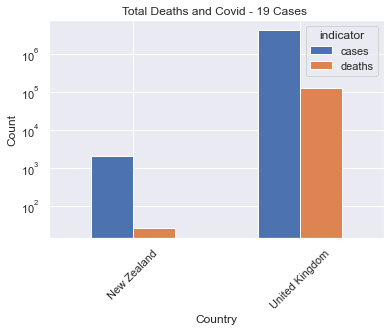

In [15]:
#Plotting total cases and deaths for each country
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid")
totals.unstack('indicator',fill_value=0).plot(kind='bar', rot=45,logy=True)
plt.title("Total Deaths and Covid - 19 Cases ")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

#### Weekly progress of deaths over time in both the countries

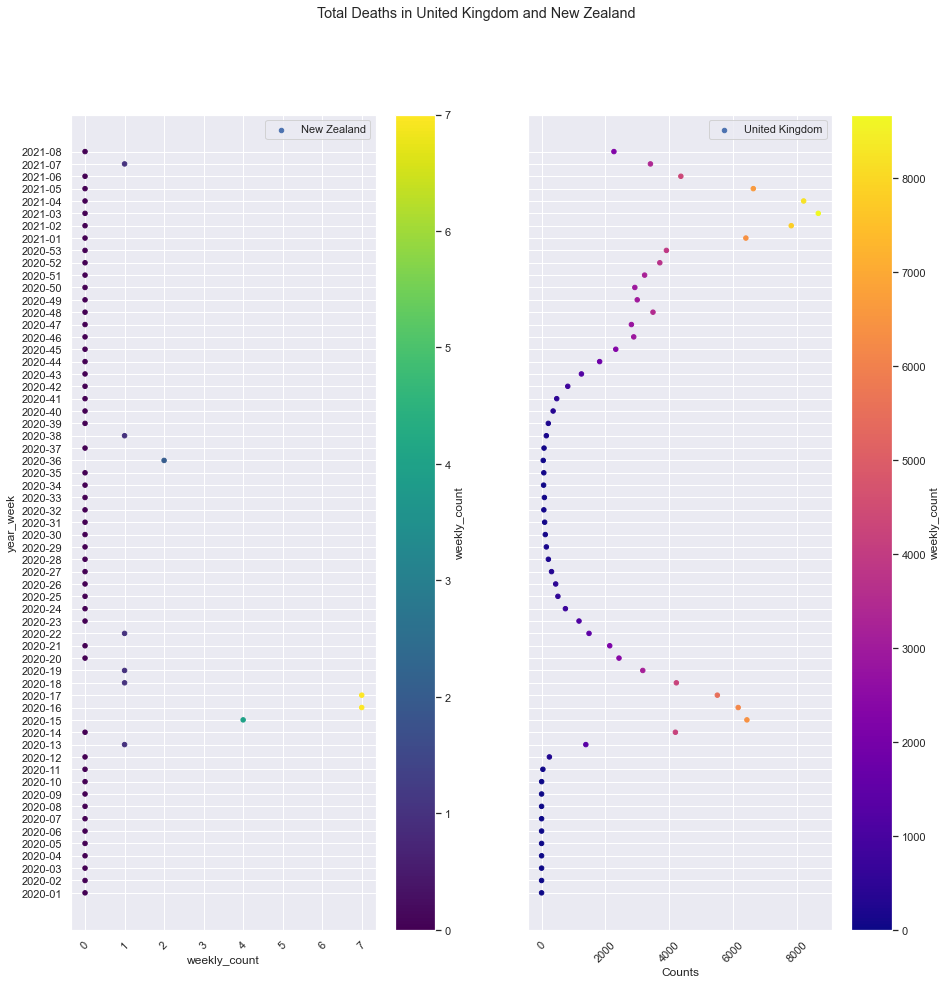

In [16]:
#Scatter plot for weekly progress of weekly deaths:
fig, axes=plt.subplots(1,2,sharey=True)
plt.ylabel("Year/Week")
covid_cases.loc[np.logical_and(covid_cases['indicator']=='deaths',covid_cases['country']=='New Zealand')].plot(kind="scatter",colormap='viridis', y="year_week",x="weekly_count", c="weekly_count", label="New Zealand", rot=45, figsize=(15, 15), ax=axes[0])
plt.xlabel("Counts")
covid_cases.loc[np.logical_and(covid_cases['indicator']=='deaths',covid_cases['country']=='United Kingdom')].plot(kind="scatter",colormap='plasma', y="year_week",x="weekly_count", c="weekly_count", label="United Kingdom",rot=45,  figsize=(15, 15), ax=axes[1])
plt.xlabel("Counts")
fig.suptitle("Total Deaths in United Kingdom and New Zealand")
plt.show()

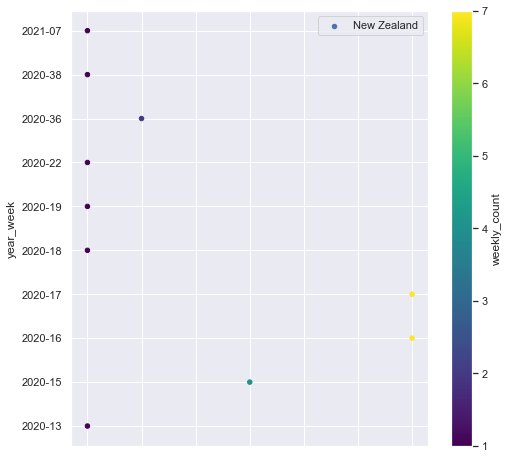

In [17]:
#Scatter plot for weekly progress of weekly deaths:
covid_cases.loc[np.logical_and(np.logical_and(covid_cases['indicator']=='deaths',covid_cases['country']=='New Zealand'), covid_cases['weekly_count']>0)].plot(kind="scatter",colormap='viridis', y="year_week",x="weekly_count", c="weekly_count", label="New Zealand", rot=45, figsize=(8, 8))
plt.xlabel("Counts")
fig.suptitle("Total Deaths in New Zealand")
plt.show()

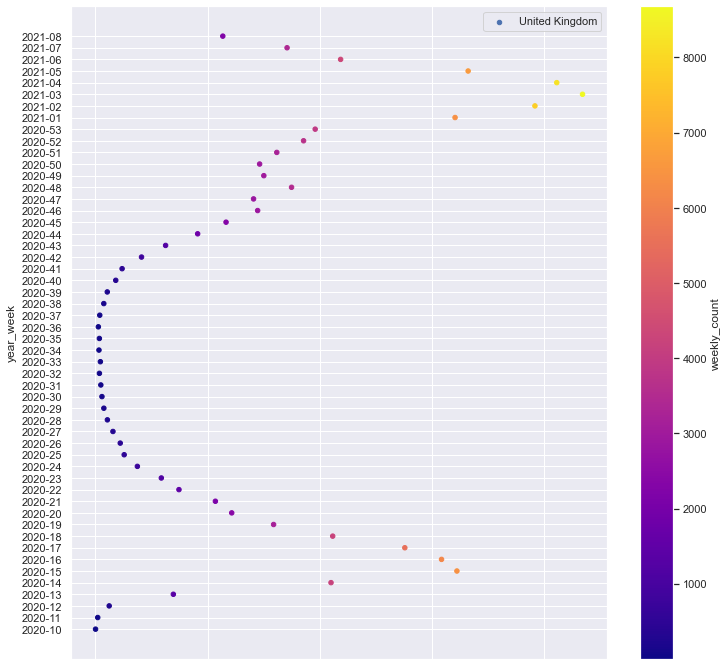

In [18]:
covid_cases.loc[np.logical_and(np.logical_and(covid_cases['indicator']=='deaths',covid_cases['country']=='United Kingdom'), covid_cases['weekly_count']>0)].plot(kind="scatter",colormap='plasma', y="year_week",x="weekly_count", c="weekly_count", label="United Kingdom",rot=45,  figsize=(12, 12))
plt.xlabel("Counts")
fig.suptitle("Total Deaths in United Kingdom")
plt.show()

#### Weekly progress of cases over time in both the countries

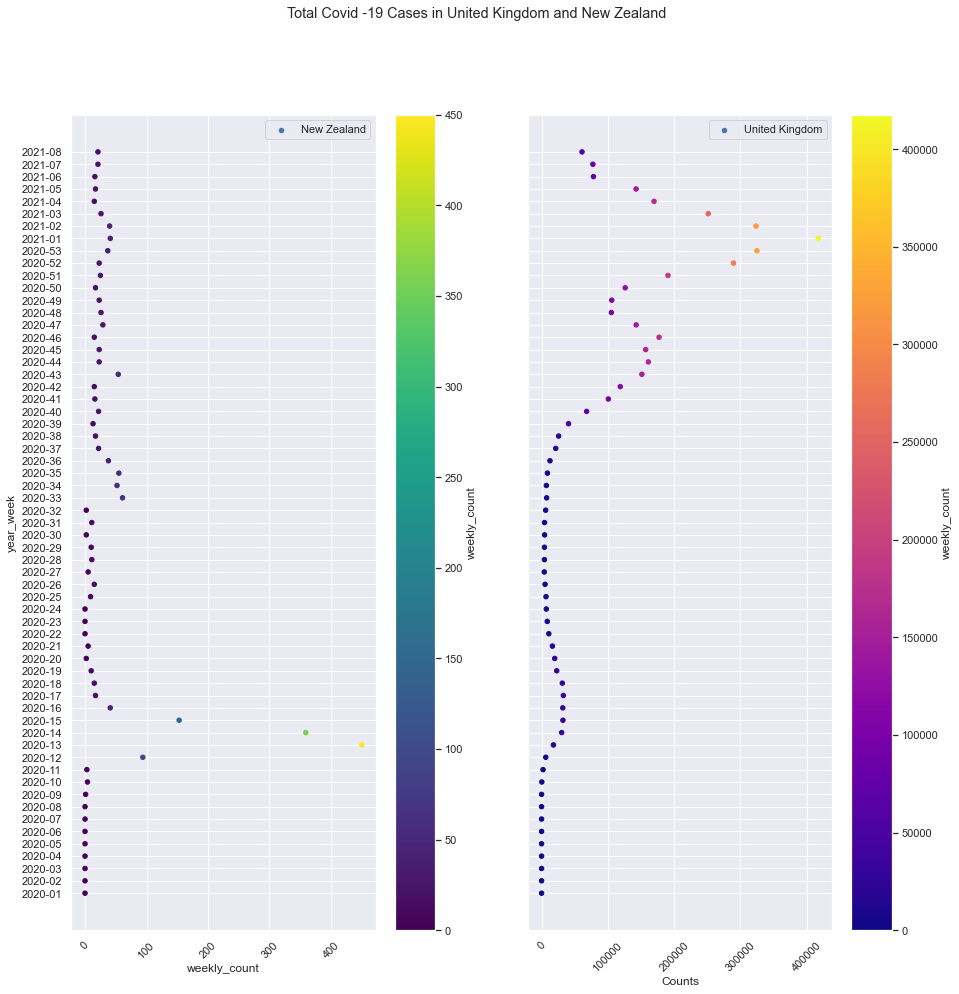

In [19]:
#Scatter plot for weekly progress of cases 
fig, axes=plt.subplots(1,2, sharey=True)
plt.ylabel("Year/Week")
covid_cases.loc[np.logical_and(covid_cases['indicator']=='cases',covid_cases['country']=='New Zealand')].plot(kind="scatter",colormap='viridis', y="year_week",x="weekly_count", c="weekly_count", label="New Zealand", rot=45, figsize=(15, 15), ax=axes[0])
plt.xlabel("Counts")
covid_cases.loc[np.logical_and(covid_cases['indicator']=='cases',covid_cases['country']=='United Kingdom')].plot(kind="scatter",colormap='plasma', y="year_week",x="weekly_count", c="weekly_count", label="United Kingdom",rot=45,  figsize=(15, 15), ax=axes[1])
plt.xlabel("Counts")
fig.suptitle("Total Covid -19 Cases in United Kingdom and New Zealand")
plt.show()

### GDP
#### Explore the GDP for both the countries

In [20]:
# Read the file of GDP cases of UK and NZ from the csv file
gdp=pd.read_csv(r"UK_NZ_GDP.csv")

In [21]:
#Using shape() fundtion to show total no. of rows and columns:
gdp.shape

(88, 3)

In [22]:
#Using head() function to show 1st two rows of the GDP data:
gdp.head(2)

,Country,Year,GDPin(m)
0,UK,2010 Q1,457058
1,UK,2010 Q2,461765


In [23]:
#Using tail() function to show last five rows of the GDP data:
gdp.tail(5)

,Country,Year,GDPin(m)
83,NZ,2019Q4,64620
84,NZ,2020Q1,63849
85,NZ,2020Q2,56802
86,NZ,2020Q3,64753
87,NZ,2020Q4,64116


In [24]:
#Using info() function to show any missing values or data types of the variables:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   88 non-null     object
 1   Year      88 non-null     object
 2   GDPin(m)  88 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [25]:
#Using value_counts() fundtion to show country and year vise total counts:to check balance of records
gdp.Country.value_counts()

UK    44
NZ    44
Name: Country, dtype: int64

In [26]:
#Using value_counts() fundtion to show country and year vise total counts:to check balance of records
gdp.Year.value_counts()

2013Q4     1
2013Q1     1
2013 Q3    1
2015 Q2    1
2016Q4     1
          ..
2018Q4     1
2019 Q2    1
2012Q4     1
2010Q3     1
2013Q2     1
Name: Year, Length: 88, dtype: int64

In [27]:
#Using value_counts() fundtion to show country and year vise total counts:to check balance of records
gdp.groupby(['Country', 'Year']).size()

Country  Year   
NZ       2010Q1     1
         2010Q2     1
         2010Q3     1
         2010Q4     1
         2011Q1     1
                   ..
UK       2019 Q4    1
         2020 Q1    1
         2020 Q2    1
         2020 Q3    1
         2020 Q4    1
Length: 88, dtype: int64

In [28]:
#Adding 'OnlyYear' column to see data as Year:
gdp['OnlyYear']=gdp['Year'].str[:4]

gdp

,Country,Year,GDPin(m),OnlyYear
0,UK,2010 Q1,457058,2010
1,UK,2010 Q2,461765,2010
2,UK,2010 Q3,465134,2010
3,UK,2010 Q4,465290,2010
4,UK,2011 Q1,466970,2011
...,...,...,...,...
83,NZ,2019Q4,64620,2019
84,NZ,2020Q1,63849,2020
85,NZ,2020Q2,56802,2020
86,NZ,2020Q3,64753,2020


In [29]:
#Excluding Q4 of 2020 from both countries since in NZ, Q4 is missing:
#gdp1=gdp[gdp['Year'] !="2020 Q4"]
#after EDA we were able to update the quarter 4 for NZ

#Using sum function to show year vise total value of GDP:
gdp.groupby(['Country', 'OnlyYear'])['GDPin(m)'].sum()

Country  OnlyYear
NZ       2010         196763
         2011         200341
         2012         205249
         2013         209981
         2014         217812
         2015         225755
         2016         234669
         2017         242931
         2018         251125
         2019         257034
         2020         249520
UK       2010        1849247
         2011        1872838
         2012        1899626
         2013        1941155
         2014        1996725
         2015        2043909
         2016        2079113
         2017        2115296
         2018        2141792
         2019        2172511
         2020        1956992
Name: GDPin(m), dtype: int64

In [30]:
#Using describe() function to show statstics of GDP data:
gdp.describe()

,GDPin(m)
count,88.00
mean,279095.27
std,224736.53
min,49031.00
25%,56526.00
50%,246530.00
75%,502587.00
max,544733.00


#### Explore the GDP since 2010 and explore if it has increased or decreased in 2020

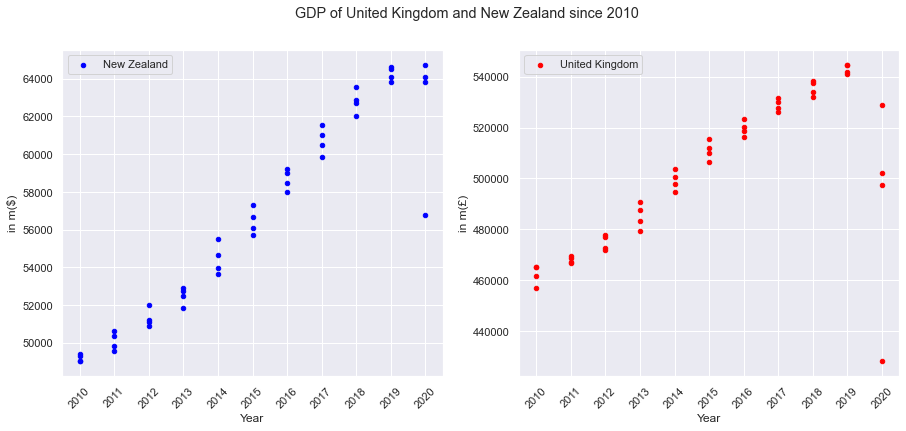

In [31]:
#Plotting of year vise GDP value for both countries together:
import warnings
warnings.filterwarnings('ignore')

#Scatter plot for GDP since 2010 with differnt y axis values to reflect difference in their GDP
fig, axes=plt.subplots(1,2)
gdp.loc[gdp['Country']=='NZ'].plot(kind="scatter", x="OnlyYear",y="GDPin(m)",  color="blue",label="New Zealand", rot=45, figsize=(15, 6), ax=axes[0])
gdp.loc[gdp['Country']=='UK'].plot(kind="scatter", x="OnlyYear",y="GDPin(m)",  color="red",label="United Kingdom",rot=45,  figsize=(15, 6), ax=axes[1])
fig.suptitle("GDP of United Kingdom and New Zealand since 2010")
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')
axes[0].set_ylabel('in m($)')
axes[1].set_ylabel('in m(£)')
plt.show()

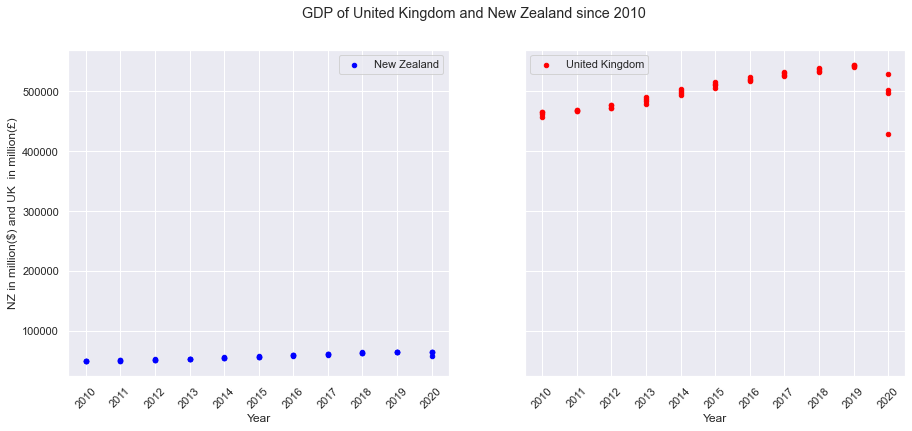

In [32]:
#Plotting of year vise GDP value for both countries together:
import warnings
warnings.filterwarnings('ignore')

#Scatter plot for GDP since 2010  (same y- axis value)
fig, axes=plt.subplots(1,2, sharey=True)
gdp.loc[gdp['Country']=='NZ'].plot(kind="scatter", x="OnlyYear",y="GDPin(m)",  color="blue",label="New Zealand", rot=45, figsize=(15, 6), ax=axes[0])
gdp.loc[gdp['Country']=='UK'].plot(kind="scatter", x="OnlyYear",y="GDPin(m)",  color="red",label="United Kingdom",rot=45,  figsize=(15, 6), ax=axes[1])
fig.suptitle("GDP of United Kingdom and New Zealand since 2010")
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')
axes[0].set_ylabel('NZ in million($) and UK  in million(£)')
axes[1].set_ylabel('in m(£)')
plt.show()

In [33]:
gdp['gdpinUS$']=0


In [34]:
l=gdp.shape[0]
l

for i in range(0,l):
   if gdp.iloc[i]['Country']=='NZ':
    gdp.iloc[i]['gdpinUS$']=gdp.iloc[i]['GDPin(m)']*0.71
   else:
    gdp.iloc[i]['gdpinUS$']=gdp.iloc[i]['GDPin(m)']*1.38
    



In [35]:
gdp

,Country,Year,GDPin(m),OnlyYear,gdpinUS$
0,UK,2010 Q1,457058,2010,0
1,UK,2010 Q2,461765,2010,0
2,UK,2010 Q3,465134,2010,0
3,UK,2010 Q4,465290,2010,0
4,UK,2011 Q1,466970,2011,0
...,...,...,...,...,...
83,NZ,2019Q4,64620,2019,0
84,NZ,2020Q1,63849,2020,0
85,NZ,2020Q2,56802,2020,0
86,NZ,2020Q3,64753,2020,0


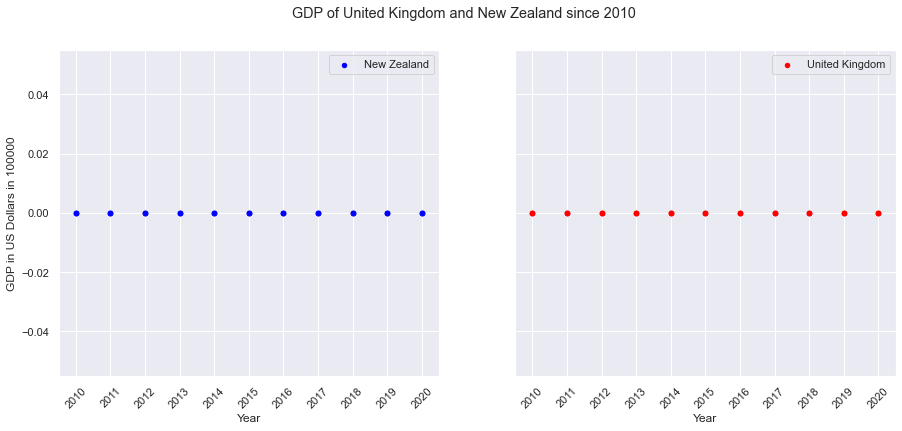

In [36]:
#Scatter plot for GDP since 2010  (same y- axis value)
fig, axes=plt.subplots(1,2, sharey=True)
gdp.loc[gdp['Country']=='NZ'].plot(kind="scatter", x="OnlyYear",y="gdpinUS$",  color="blue",label="New Zealand", rot=45, figsize=(15, 6), ax=axes[0])
gdp.loc[gdp['Country']=='UK'].plot(kind="scatter", x="OnlyYear",y="gdpinUS$",  color="red",label="United Kingdom",rot=45,  figsize=(15, 6), ax=axes[1])
fig.suptitle("GDP of United Kingdom and New Zealand since 2010")
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')
axes[0].set_ylabel('GDP in US Dollars in 100000')
plt.show()

### Unemployment 

#### Explore the unemployment in both the countries

In [37]:
#Read file of unemployment cases for both the countries:
Unemployment = pd.read_excel(r"UK_NZ_UNEmployment.xlsx")
Unemployment.columns

Index(['Country', 'Qyear', 'Men', 'Women', 'Total'], dtype='object')

In [38]:
#Using head() function to show 1st five rows of the Unemployment data:
Unemployment.head()

,Country,Qyear,Men,Women,Total
0,NZ,2010-03-01,5.60,6.30,5.90
1,NZ,2010-06-01,6.70,6.50,6.60
2,NZ,2010-09-01,5.60,6.60,6.10
3,NZ,2010-12-01,6.00,6.50,6.20
4,NZ,2011-03-01,5.70,6.40,6.00


In [39]:
#Using tail() function to show 1st five rows of the GDP data:
Unemployment.tail()

,Country,Qyear,Men,Women,Total
170,UK,2020 JUL,4.90,4.00,4.45
171,UK,2020 AUG,5.20,4.30,4.75
172,UK,2020 SEP,5.30,4.60,4.95
173,UK,2020 OCT,5.40,4.70,5.05
174,UK,2020 NOV,5.40,4.80,5.10


In [40]:
#Using info() function to show any missing values or data types of the variables:
Unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  175 non-null    object 
 1   Qyear    175 non-null    object 
 2   Men      175 non-null    float64
 3   Women    175 non-null    float64
 4   Total    175 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [41]:
#Using describe() function to show statstics of Unemployment of Men data:
Unemployment['Men'].describe()

count   175.00
mean      5.89
std       1.74
min       3.60
25%       4.35
50%       5.20
75%       7.85
max       9.10
Name: Men, dtype: float64

In [42]:
#Using describe() function to show statstics of Unemployment of Men and Women data:
Unemployment['Women'].describe()

count   175.00
mean      5.58
std       1.31
min       3.50
25%       4.35
50%       5.40
75%       6.85
max       7.80
Name: Women, dtype: float64

In [43]:
#Adding 'year' column to the dataset:
Unemployment['year']=Unemployment['Qyear'].str[:4]

In [44]:
#Finding mean value for each year for both the countries:
Unemployment.groupby(['Country', 'year'])['Total'].mean()

Country  year
NZ       2010   6.20
         2011   6.05
         2012   6.45
         2013   5.83
         2014   5.42
         2015   5.42
         2016   5.17
         2017   4.72
         2018   4.30
         2019   4.12
         2020   4.60
UK       2010   7.81
         2011   8.05
         2012   7.96
         2013   7.56
         2014   6.17
         2015   5.36
         2016   4.90
         2017   4.39
         2018   4.07
         2019   3.83
         2020   4.41
Name: Total, dtype: float64

#### Explore the Unemployment since 2010 and explore if it has increased or decreased in 2020

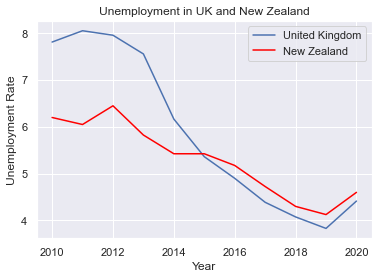

In [45]:
#Plotting the line for unemployment rate for both the countries
Unemployment[Unemployment['Country']=='UK'].groupby('year')['Total'].mean().plot(label="United Kingdom") 
Unemployment[Unemployment['Country']=='NZ'].groupby('year')['Total'].mean().plot(label="New Zealand",color="red",xlabel="Year",ylabel="Unemployment Rate", title="Unemployment in UK and New Zealand")
plt.legend()
plt.show()

<Figure size 864x864 with 0 Axes>

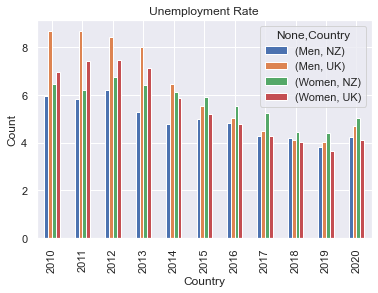

In [46]:
import warnings
warnings.filterwarnings('ignore')
Ump1=Unemployment.groupby(['Country', 'year'])['Men','Women'].mean()
plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid")
Ump1.unstack('Country',fill_value=0).plot(kind='bar', title="Unemployment Rate", xlabel="Country", ylabel="Count")
plt.show()

### Self assessment of peoples Wellbeing 

#### Explore the measure which are being used to assess the wellbeing of people in both the countries 

In [47]:
#Reading file for well-being data of both the countries:
NZ = pd.read_csv(r"NZ_wellbeing_june_september_december_2020_quarters.csv")
UK= pd.read_excel(r"UK_Well_beingdata.xlsx", sheet_name="Figure 3")

In [48]:
#Using head() function for UK well-being data:
UK.head(2)

,TimePeriod,Year,Weekly life satisfaction score,Weekly worthwhile score,Weekly happiness score,Weekly anxiety score
0,Feb,2020,7.30,7.60,7.20,3.50
1,20 to 30 Mar,2020,7.20,7.40,6.40,5.20


In [49]:
#Using head() function for UK well-being data:
NZ.head(2)

,Wellbeing measure,Jun20,Sep20,Dec20
0,High overall life satisfaction,85.20,84.10,86.50
1,High life worthwhile,88.10,88.40,89.10


In [50]:
#Using info() command for showing about any null values and variable types for UK:
UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TimePeriod                      48 non-null     object 
 1   Year                            48 non-null     int64  
 2   Weekly life satisfaction score  48 non-null     float64
 3   Weekly worthwhile score         48 non-null     float64
 4   Weekly happiness score          48 non-null     float64
 5   Weekly anxiety score            48 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.4+ KB


In [51]:
#Using info() command for showing about any null values and variable types for NZ:
NZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wellbeing measure  8 non-null      object 
 1   Jun20              8 non-null      float64
 2   Sep20              8 non-null      float64
 3   Dec20              8 non-null      float64
dtypes: float64(3), object(1)
memory usage: 384.0+ bytes


#### Explore the Well being in United Kingdom (UK) in 2020

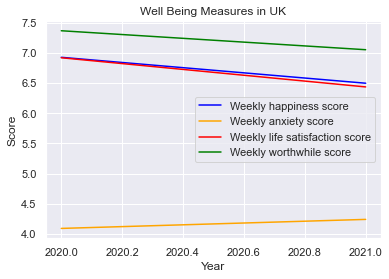

In [52]:
#Plotting of different measurements of well-being for UK:
UK.groupby(['Year'])['Weekly happiness score'].mean().plot(color="Blue") 
UK.groupby(['Year'])['Weekly anxiety score'].mean().plot(color="Orange") 
UK.groupby(['Year'])['Weekly life satisfaction score'].mean().plot(color="Red") 
UK.groupby(['Year'])['Weekly worthwhile score'].mean().plot(color="green", xlabel="Year", ylabel="Score", title="Well Being Measures in UK")
plt.legend()
plt.show()

#### Explore the Well being in New Zealand (NZ)  in 2020

<AxesSubplot:title={'center':"Well Being in NZ for 3 Quarter's "}, xlabel='Measures Numbered as 0-7', ylabel='score'>

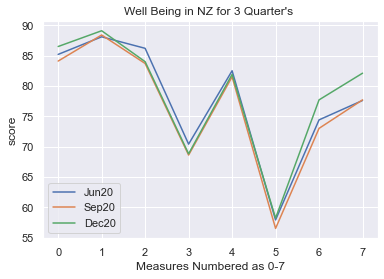

In [53]:
#Plotting of different measurements of well-being for NZ
NZ.plot(xlabel="Measures Numbered as 0-7", ylabel="score", title="Well Being in NZ for 3 Quarter's ")


## Conclusion of Stage 1 

1. Removed summary fields
2. Separated data dictionaries
3. Combined data for UK and NZ in one file
4. No changes made to data types, values
5. Removed data for earlier years than 2010 where required

Here is the what we will be dealing in the carry out in the next stage

1. Covid- Cases      
      1. No Null values. 
      2. No Incomplete records 
      3. Some fields have data value as NaN that will be ignored 

2. GDP              | 
     1. No Null values. 
     2. No Incomplete records 
     3. 2020 Q4 quarter for NZ is not available. 
     4. The Year field has Year and Quarter Number . The representation of UK is 2010 whereas in NZ it is 2010Q1 
     5. The data was combined from two different files, the GDP value is in different currency 
3. Unemployment     
     1. No Null values. 
     2. No Incomplete records 
     3. The data for New Zealand is in Quarters and data for UK is in months. The format will be changed and the records will be grouped. 

4. Wellbeing       
    1. No Null values. 
    2. No Incomplete records 
    3. In UK there are 4 measures, they are in Columns and date is in days range,  where month and year overlaps. UK data available for 2020 and Q1 of 2021. 
    4. In NZ, Cumulative Score for 8 measures for three quarters in 2020.
 

# Stage 2 : Data Cleaning and Analysis

We have taken following steps to prepare our data for visualizations and final analysis

1. Revisited the plots made above and refined and replotted them with labelling
2. Added one more file for Covis-19 with added features
3. Transformed data in the files using pandas features transpose, stack, melt etc and combined them to write final files for visualizations in Tableau.
4. We had to do the EDA for the file that was added.
5. We created our own data file from news articles and websites to measure the stargegy adapted by both the countries.
6. Reloaded the updated files from sources.

## EDA for the new file added for covid-19 cases

### covid-19 cases


In [54]:
# Read the file of updated cases of UK and NZ from the csv file
ncovid=pd.read_csv(r"owid-covid-data.csv")

In [55]:
#Using shape() function to show total no. of rows and columns:
ncovid.shape

(78457, 59)

In [56]:
#info
ncovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78457 entries, 0 to 78456
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               78457 non-null  object 
 1   continent                              74625 non-null  object 
 2   location                               78457 non-null  object 
 3   date                                   78457 non-null  object 
 4   total_cases                            76903 non-null  float64
 5   new_cases                              76901 non-null  float64
 6   new_cases_smoothed                     75900 non-null  float64
 7   total_deaths                           67514 non-null  float64
 8   new_deaths                             67672 non-null  float64
 9   new_deaths_smoothed                    75900 non-null  float64
 10  total_cases_per_million                76485 non-null  float64
 11  ne

In [57]:
#select data only for UK and NZ
sel_ncovid=ncovid[np.logical_or(ncovid['location']=='United Kingdom',ncovid['location']=='New Zealand')]

In [58]:
#data count fr each country
sel_ncovid.location.value_counts()

United Kingdom    425
New Zealand       397
Name: location, dtype: int64

In [59]:
#shape
sel_ncovid.shape

(822, 59)

#### How similar is United Kingdom to New Zealand?

In [60]:
#selected facts (constant values) from the dataset for both the countries
facts=sel_ncovid[['location','population','population_density', 'cardiovasc_death_rate','diabetes_prevalence','life_expectancy','human_development_index','median_age','aged_70_older']]


In [61]:
#removed duplicates
facts=facts.drop_duplicates(subset=['location'])
facts

,location,population,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,median_age,aged_70_older
50006,New Zealand,4822233.00,18.21,128.80,8.08,82.29,0.93,37.90,9.72
73945,United Kingdom,67886004.00,272.90,122.14,4.28,81.32,0.93,40.80,12.53


In [62]:
#selected required fields from the dataset for both the countries
sel_ncovid=sel_ncovid[['location','date','new_cases','new_deaths','new_tests','positive_rate','new_vaccinations','stringency_index']]

In [63]:
#shape for selected records and columns
sel_ncovid.shape

(822, 8)

In [64]:
sel_ncovid=sel_ncovid.replace(np.nan,0)

In [65]:
sel_ncovid.head(200)

,location,date,new_cases,new_deaths,new_tests,positive_rate,new_vaccinations,stringency_index
50006,New Zealand,2020-02-28,1.00,0.00,0.00,0.00,0.00,19.44
50007,New Zealand,2020-02-29,0.00,0.00,0.00,0.00,0.00,19.44
50008,New Zealand,2020-03-01,0.00,0.00,0.00,0.00,0.00,19.44
50009,New Zealand,2020-03-02,0.00,0.00,29.00,0.00,0.00,19.44
50010,New Zealand,2020-03-03,0.00,0.00,26.00,0.00,0.00,19.44
...,...,...,...,...,...,...,...,...
50201,New Zealand,2020-09-10,1.00,0.00,8551.00,0.00,0.00,34.72
50202,New Zealand,2020-09-11,2.00,0.00,8915.00,0.00,0.00,34.72
50203,New Zealand,2020-09-12,2.00,0.00,7485.00,0.00,0.00,34.72
50204,New Zealand,2020-09-13,1.00,0.00,3862.00,0.00,0.00,34.72


In [66]:
#plot for monthly stringency Index

sel_ncovid['date']=pd.to_datetime(sel_ncovid['date'])
#sel_ncovid['monthYear']=sel_ncovid['date'].dt.strftime('%B %Y')

In [67]:
sel_ncovid.groupby(['location',sel_ncovid['date'].dt.year,sel_ncovid['date'].dt.month])['new_tests'].sum()

location        date  date
New Zealand     2020  2             0.00
                      3         24861.00
                      4        116255.00
                      5        135051.00
                      6        120050.00
                      7         66137.00
                      8        293745.00
                      9        182178.00
                      10       147078.00
                      11       152630.00
                      12        50448.00
                2021  1         49626.00
                      2        145086.00
                      3        101399.00
United Kingdom  2020  1             0.00
                      2             0.00
                      3         11896.00
                      4        718807.00
                      5       2520931.00
                      6       2656857.00
                      7       3949332.00
                      8       5230736.00
                      9       6879501.00
                      10      

#### How did stringency index affect the cases? What was the average stringecy index for UK and NZ? 

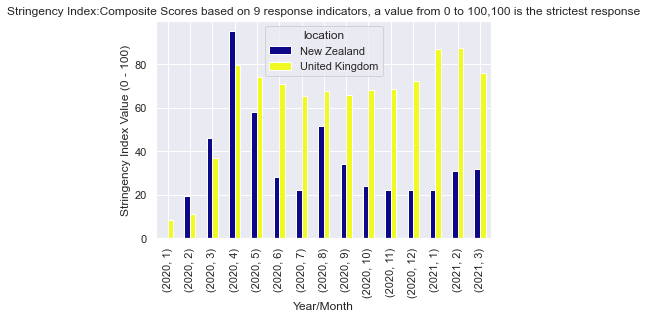

In [68]:
sel_ncovid.groupby(['location',sel_ncovid['date'].dt.year,sel_ncovid['date'].dt.month])['stringency_index'].mean().unstack('location',fill_value=0).plot(colormap='plasma', kind='bar', title="Stringency Index:Composite Scores based on 9 response indicators, a value from 0 to 100,100 is the strictest response", xlabel="Year/Month", ylabel="Stringency Index Value (0 - 100)")
plt.show()

#### How many Tests have taken place in both the countries? When did the testing start?

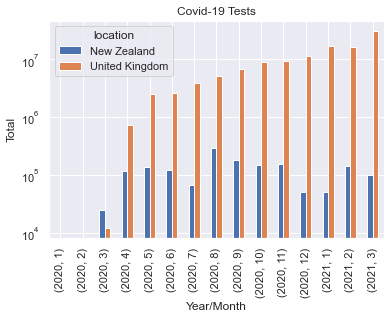

In [69]:
#tests
sel_ncovid.groupby(['location',sel_ncovid['date'].dt.year,sel_ncovid['date'].dt.month])['new_tests'].sum().unstack('location',fill_value=0).plot(kind='bar', title="Covid-19 Tests", xlabel="Year/Month", ylabel="Total",logy=True)
plt.show()

#### How many Vaccinations have taken place so far in both the countries? When did the vaccinations start?

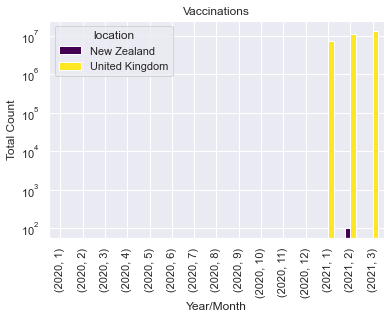

In [70]:
#vaccinations
sel_ncovid.groupby(['location',sel_ncovid['date'].dt.year,sel_ncovid['date'].dt.month])['new_vaccinations'].sum().unstack('location',fill_value=0).plot(colormap="viridis",kind='bar', title="Vaccinations", xlabel="Year/Month", ylabel="Total Count",logy=True)
plt.show()

#### What is the positive rate? 

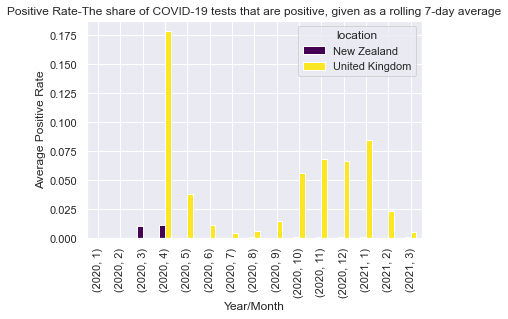

In [71]:
#positive rate
sel_ncovid.groupby(['location',sel_ncovid['date'].dt.year,sel_ncovid['date'].dt.month])['positive_rate'].mean().unstack('location',fill_value=0).plot(colormap="viridis",kind='bar', title="Positive Rate-The share of COVID-19 tests that are positive, given as a rolling 7-day average", xlabel="Year/Month", ylabel="Average Positive Rate")
plt.show()

In [72]:
#Data Cleaning
#Covid_cases
#creating a pivot
covidcases=covid_cases.pivot(index='year_week',columns=['country','indicator'],values='weekly_count')


<AxesSubplot:title={'center':'Covid-19 Scenario in New Zealand'}, xlabel='Year/Month', ylabel='Count'>

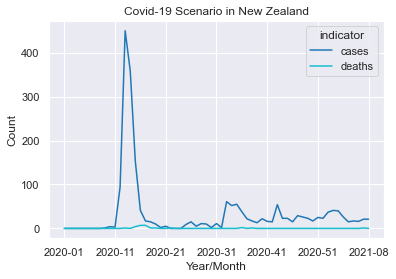

In [73]:
covidcases['New Zealand'].plot(colormap="tab10", title="Covid-19 Scenario in New Zealand", xlabel="Year/Month", ylabel="Count")


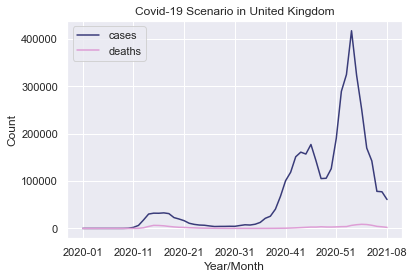

In [74]:
covidcases['United Kingdom'].plot(colormap="tab20b", title="Covid-19 Scenario in United Kingdom", xlabel="Year/Month", ylabel="Count")
plt.legend()
plt.show()

## Cleaning of all the files and writing them to new files

### covid-19 cases

In [75]:
sel_ncovid=sel_ncovid.rename(columns={'location':'Country'})
sel_ncovid

,Country,date,new_cases,new_deaths,new_tests,positive_rate,new_vaccinations,stringency_index
50006,New Zealand,2020-02-28,1.00,0.00,0.00,0.00,0.00,19.44
50007,New Zealand,2020-02-29,0.00,0.00,0.00,0.00,0.00,19.44
50008,New Zealand,2020-03-01,0.00,0.00,0.00,0.00,0.00,19.44
50009,New Zealand,2020-03-02,0.00,0.00,29.00,0.00,0.00,19.44
50010,New Zealand,2020-03-03,0.00,0.00,26.00,0.00,0.00,19.44
...,...,...,...,...,...,...,...,...
74365,United Kingdom,2021-03-26,6235.00,71.00,722814.00,0.01,694959.00,78.70
74366,United Kingdom,2021-03-27,3909.00,58.00,471328.00,0.00,657816.00,75.93
74367,United Kingdom,2021-03-28,3947.00,21.00,1641942.00,0.00,440327.00,75.93
74368,United Kingdom,2021-03-29,4783.00,23.00,0.00,0.00,399863.00,0.00


In [76]:
pd.melt(sel_ncovid, id_vars=['Country','date'],value_vars=['new_cases', 'new_deaths','new_tests','positive_rate','new_vaccinations', 'stringency_index'] ).to_csv(r'DAB103_Project_S2_files\covid1.csv',index=False)


In [77]:
#Writing data to a file
sel_ncovid.to_csv(r'DAB103_Project_S2_files\covid.csv',index=False)

### GDP and Unemployment to be cleaned and combined together

#### GDP

In [78]:
#GDP
#Make the format of Year same for both UK and NZ
gdp['Year']=gdp['Year'].str.replace(' ','')

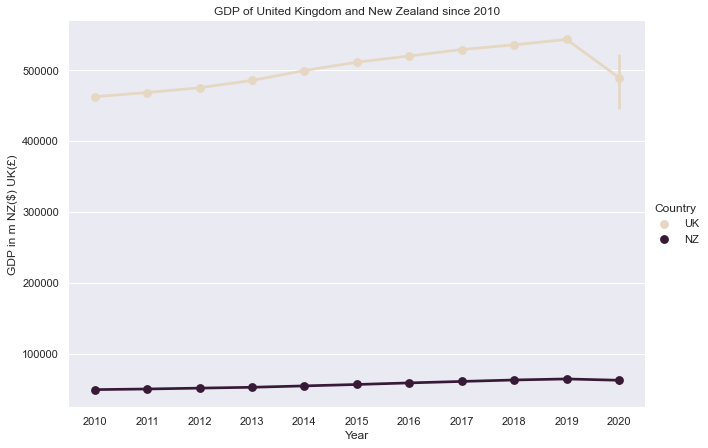

In [79]:
#GDP
fig1=sns.catplot(data=gdp,x='OnlyYear',hue='Country',y='GDPin(m)', kind="point", palette="ch:.25",height=6, aspect=1.5)
fig1.set(xlabel="Year",ylabel="GDP in m NZ($) UK(£)", title="GDP of United Kingdom and New Zealand since 2010")
plt.show()

In [80]:
gdp=gdp.sort_values(['Country','Year'],ascending=True)

In [81]:
Unemployment=Unemployment.sort_values(['Country','Qyear'],ascending=True)

In [82]:
#combining GDP and Unemployment Rate together
gdp['Men_Unemployment']=Unemployment['Men']
gdp['Women_Unemployment']=Unemployment['Women']
gdp['Total_Unemployment']=Unemployment['Total']

In [83]:
gdp.reset_index(drop=True, inplace=True)

In [84]:
gdp

,Country,Year,GDPin(m),OnlyYear,gdpinUS$,Men_Unemployment,Women_Unemployment,Total_Unemployment
0,NZ,2010Q1,49047,2010,0,9.00,6.70,7.85
1,NZ,2010Q2,49401,2010,0,9.10,6.70,7.90
2,NZ,2010Q3,49284,2010,0,9.00,6.70,7.85
3,NZ,2010Q4,49031,2010,0,8.80,6.90,7.85
4,NZ,2011Q1,49564,2011,0,8.70,6.90,7.80
...,...,...,...,...,...,...,...,...
83,UK,2019Q4,544733,2019,0,3.80,4.30,4.10
84,UK,2020Q1,529031,2020,0,4.10,4.40,4.20
85,UK,2020Q2,428307,2020,0,3.60,4.50,4.00
86,UK,2020Q3,497401,2020,0,4.80,5.80,5.30


In [85]:
#Writing data to a file
gdp.to_csv(r'DAB103_Project_S2_files\GDP_UE.csv',index=False)

#### Unemployment 

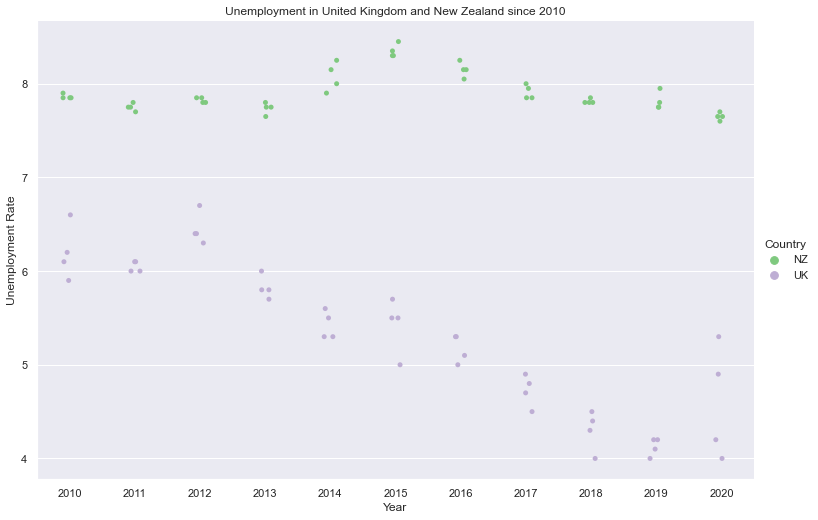

In [86]:
#Unemployment
fig1=sns.catplot(data=gdp,x='OnlyYear',hue='Country',y='Total_Unemployment',  palette="Accent",height=7,aspect=1.5)
fig1.set(xlabel="Year",ylabel="Unemployment Rate", title="Unemployment in United Kingdom and New Zealand since 2010")
plt.show()

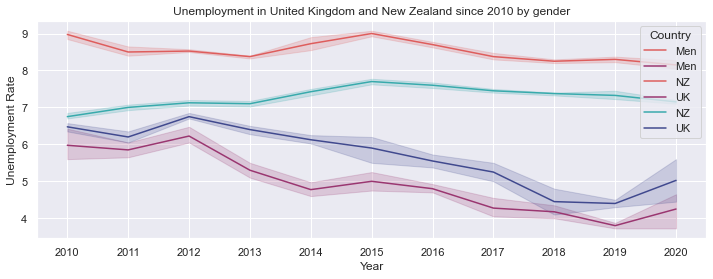

In [87]:
#Unemployment
plt.figure(figsize=(12,4))
fig1=sns.lineplot(data=gdp,x="OnlyYear", y="Men_Unemployment", hue="Country", palette="flare",label="Men")
fig1=sns.lineplot(data=gdp,x="OnlyYear", y="Women_Unemployment", hue="Country", palette="mako_r")
fig1.set(xlabel="Year",ylabel="Unemployment Rate", title="Unemployment in United Kingdom and New Zealand since 2010 by gender")
plt.show()

### Cleaning of Well being data and combine UK and New Zealand data

#### UK 

In [88]:
#WellBeing Cleaning Data of UK
#Extracting Month in the timeperiod
UK['TimePeriod1']=UK['TimePeriod'].str[-4:]
#removing extra whitespaces 
UK['TimePeriod1']=UK['TimePeriod1'].str.replace(' ','')
#converting Sept to three letter month abr
UK['TimePeriod1']=UK['TimePeriod1'].str.replace('Sept','Sep')

In [89]:
UK

,TimePeriod,Year,Weekly life satisfaction score,Weekly worthwhile score,Weekly happiness score,Weekly anxiety score,TimePeriod1
0,Feb,2020,7.30,7.60,7.20,3.50,Feb
1,20 to 30 Mar,2020,7.20,7.40,6.40,5.20,Mar
2,27 Mar to 6 Apr,2020,7.10,7.50,6.40,5.00,Apr
3,3 to 13 Apr,2020,6.90,7.40,6.60,4.90,Apr
4,9 to 20 Apr,2020,7.10,7.50,6.90,4.20,Apr
5,17 to 27 Apr,2020,6.80,7.30,6.70,4.20,Apr
6,24 Apr to 3 May,2020,6.90,7.30,6.80,4.10,May
7,1 to 10 May,2020,7.20,7.50,7.00,4.00,May
8,7 to 17 May,2020,6.90,7.30,6.80,4.10,May
9,14 to 17 May,2020,6.90,7.30,7.00,4.00,May


In [90]:
#Converting month into numeric and then into quarter so that we can select specific quarter and then summarise
from time import strptime
import datetime as dt
y=len(UK['TimePeriod'])
for i in range(0,y):
 x=strptime(UK['TimePeriod1'][i],'%b').tm_mon
 UK['TimePeriod1'][i]=(((x-1)//3)+1)


In [91]:
UKScore=UK.groupby(['Year','TimePeriod1']).apply(lambda col: np.mean(col))


In [92]:
#Uk Wellbeing Score, calculating mean score for each quarter
UKScore=UK.groupby(['Year','TimePeriod1']).apply(lambda col: np.mean(col)).transpose()[2020][1:3]
UKScore=UKScore.reset_index()
#only selecting the records available in NZ
UKScore=UKScore[['index',2,3,4]]


#### New Zealand

In [93]:
NZScore=NZ.head(2)

In [94]:
NZScore

,Wellbeing measure,Jun20,Sep20,Dec20
0,High overall life satisfaction,85.20,84.10,86.50
1,High life worthwhile,88.10,88.40,89.10


In [95]:
NZScore['Country']="NZ"

In [96]:
NZScore['Wellbeing measure']=NZScore['Wellbeing measure'].apply(lambda col: col[(col.find("life")):])

In [97]:
NZScore

,Wellbeing measure,Jun20,Sep20,Dec20,Country
0,life satisfaction,85.20,84.10,86.50,NZ
1,life worthwhile,88.10,88.40,89.10,NZ


In [98]:
NZScore=pd.melt(NZScore, id_vars=['Country','Wellbeing measure'], value_vars=['Jun20', 'Sep20','Dec20'])

In [99]:
NZScore=NZScore.rename(columns={'variable':'Quarter','value': 'Score'})


In [100]:
NZScore

,Country,Wellbeing measure,Quarter,Score
0,NZ,life satisfaction,Jun20,85.20
1,NZ,life worthwhile,Jun20,88.10
2,NZ,life satisfaction,Sep20,84.10
3,NZ,life worthwhile,Sep20,88.40
4,NZ,life satisfaction,Dec20,86.50
5,NZ,life worthwhile,Dec20,89.10


In [101]:
NZScore['Score']=NZScore['Score']/10
NZScore

,Country,Wellbeing measure,Quarter,Score
0,NZ,life satisfaction,Jun20,8.52
1,NZ,life worthwhile,Jun20,8.81
2,NZ,life satisfaction,Sep20,8.41
3,NZ,life worthwhile,Sep20,8.84
4,NZ,life satisfaction,Dec20,8.65
5,NZ,life worthwhile,Dec20,8.91


#### Combine UK and NZ

In [102]:
UKScore['Country']="UK"
UKScore=pd.melt(UKScore, id_vars=['Country','index'], value_vars=[2,3,4])

In [103]:
UKScore['index']=UKScore['index'].str.replace('Weekly life satisfaction score','life satisfaction')
UKScore['index']=UKScore['index'].str.replace('Weekly worthwhile score','life worthwhile')
UKScore['TimePeriod1']=UKScore['TimePeriod1'].replace(2,'Jun20')
UKScore['TimePeriod1']=UKScore['TimePeriod1'].replace(3,'Sep20')
UKScore['TimePeriod1']=UKScore['TimePeriod1'].replace(4,'Dec20')


In [104]:
UKScore=UKScore.rename(columns={'index':'Wellbeing measure','TimePeriod1':'Quarter','value': 'Score'})
UKScore

,Country,Wellbeing measure,Quarter,Score
0,UK,life satisfaction,Jun20,6.99
1,UK,life worthwhile,Jun20,7.39
2,UK,life satisfaction,Sep20,6.98
3,UK,life worthwhile,Sep20,7.40
4,UK,life satisfaction,Dec20,6.75
5,UK,life worthwhile,Dec20,7.30


In [105]:
WScore=NZScore.append(UKScore)

In [106]:
WScore

,Country,Wellbeing measure,Quarter,Score
0,NZ,life satisfaction,Jun20,8.52
1,NZ,life worthwhile,Jun20,8.81
2,NZ,life satisfaction,Sep20,8.41
3,NZ,life worthwhile,Sep20,8.84
4,NZ,life satisfaction,Dec20,8.65
5,NZ,life worthwhile,Dec20,8.91
0,UK,life satisfaction,Jun20,6.99
1,UK,life worthwhile,Jun20,7.39
2,UK,life satisfaction,Sep20,6.98
3,UK,life worthwhile,Sep20,7.40


#### Writing to a file

In [107]:
#Write to file
WScore.to_csv(r'DAB103_Project_S2_files\WScore.csv',index=False)

## Analysis

### Strategy 

- New Zealand announced robust tier system in March 20, and their border remained closed since then with strict quarantine. As seen the stringency index is highest in New Zealand among the world 95.13 in April. Since they were able to contain Covid-19 due to this, they had intra country relaxations. 

- In UK the tier system changed three times. Border and quarantine not adopted till Jan 21. The index is high now however the cases are too high. NZ was in high alert in the beginning and then the alert level dropped. UK was placed on highest alert in Dec 20 after reaching highest number of deaths in the world.

### Covid Cases

- New Zealand did very well and kept the numbers contained to just 2497 and 26 deaths whereas UK has the highest number of cases in Europe mounting to 4,355,867 and nearly 126,912 deaths.

- New Zealand started the tests in Mar’20 and did 3 times as compared to UK, but now UK is doing the tests in millions. Tests of New Zealand is 1,584,544 whereas for UK it is 1,17,166,857.

- UK is doing great in vaccinations as compared to New Zealand as per the data shown in above table. However, the cases are still very high in UK.

### Economies

- GDP has dropped in both countries in 2020, The decline was very minimal for New Zealand in first three quarters.However, the last quarter has dropped so much that it came closer to their GDP 6 six years ago -2015. But, they recovered in last quarter.

- In 2019, NZ’s GDP was $257,034 and in 2020, it is $249,520 which is 2.9%.

- In UK the drop has been very significant in all the quarters and GDP has dropped to more than ten years – 2010.
- In 2019, UK’s GDP was £2,172,511 and in 2020, it was £1,956,992 which is 9.92%.

- Overall New Zealand had lower unemployment rate than United Kingdom from 2010  to 2015. In 2015 UK’s unemployment rate became lower than New Zealand and stayed like this till 2019.  

- Both countries were seeing steady decline in rate since 2015.UK and NZ both had the lowest unemployment rate in 2019, 3.83 and 4.12 respectively in 10 years.

- For UK, the rate is grown from 3.83 to 4.41 and for NZ it is grown from 4.12 to 4.60.

- The growth in unemployment rate is more for UK at 13.2% in 2020 as compared to NZ which is 10.4%. This means both the countries are now three years behind. 

### Well - Being 

- On both the measures which are life satisfaction and life worthwhile, NZ’s score dropped from June to September’20 and has risen in December’20.

- People are satisfied and feel life is worthwhile at an average score of 8.78.

- UK’s score is continuously dropping from June to December’20. Dissatisfaction has grown and overall score has drooped to 7.



## Conclusion

New Zealand announced robust tier system in March 20, and their border remained closed since then with strict quarantine.
As seen the stringency index is highest in New Zealand among the world 95.13 in April.

New Zealand had clear strategy from beginning to prevent and minimize casualties and accepted to take risk on economic front. They have stayed focused and robust in their qurantine. Covid-19 cases and deaths are lowest and New Zealand is recovering in every aspect from GDP to people satisafction. 

UK was very ambigious in their approach. Even though the tier system was announced their was no coherence in the strategy. Schools were closed but borders and shops were open, masks to test every thing was delayed. Public suppoert was also minimal due to ambiguity and non-uniformity. This has resulted in very high number of cases and deaths. The satisafction among people is low. Even though UK announced so many measures to support people and also have injected lot of money in economy, they are facing thier lowest point with unemployment increasing, gdp decreasing and fatalities still grwoing. Recovery seems far from where they are now.


